In [1]:
import cv2

In [2]:
import matplotlib.pyplot as plt

In [3]:
import matplotlib.pyplot as plt
from win32com.client import Dispatch

In [4]:
def speaktext(str):
    speak = Dispatch("SAPI.SpVoice")
    speak.speak(str)

In [5]:
config_file = 'ssd_mobilenet_v3_large_coco_2020_01_14.pbtxt'
frozen_model = 'frozen_inference_graph.pb'

In [6]:
model = cv2.dnn_DetectionModel(frozen_model ,config_file)

In [7]:
classLabels = [] #empty list of python
file_name = 'labels.txt'
with open(file_name,'rt') as fpt:
    classLabels = fpt.read().rstrip('\n').split('\n')
    #classLabels.append(fpt,read())

In [8]:
print(classLabels)

['person', 'bicycle', 'car', 'motorcycle', 'airplane', 'bus', 'train', 'truck', 'boat', 'traffic light', 'fire hydrant', 'street sign', 'stop sign', 'parking meter', 'bench', 'bird', 'cat', 'dog', 'horse', 'sheep', 'cow', 'elephant', 'bear', 'zebra', 'giraffe', 'hat', 'backpack', 'umbrella', 'shoe', 'eye glasses', 'handbag', 'tie', 'suitcase', 'frisbee', 'skis', 'snowboard', 'sports ball', 'kite', 'baseball bat', 'baseball glove', 'skateboard', 'surfboard', 'tennis racket', 'bottle', 'plate', 'wine glass', 'cup', 'fork', 'knife', 'spoon', 'bowl', 'banana', 'apple', 'sandwich', 'orange', 'broccoli', 'carrot', 'hot dog', 'pizza', 'donut', 'cake', 'chair', 'couch', 'potted plant', 'bed', 'mirror', 'dining table', 'window', 'desk', 'toilet', 'door', 'tv', 'laptop', 'mouse', 'remote', 'keyboard', 'cell phone', 'microwave', 'oven', 'toaster', 'sink', 'refrigerator', 'blender', 'book', 'clock', 'vase', 'scissors', 'teddy bear', 'hair drier', 'toothbrush', 'hair brush']


In [9]:
print(len(classLabels))

91


In [10]:
model.setInputSize(320,320)
model.setInputScale(1.0/127.5) ## 255/2=127.5
model.setInputMean(127.5) ## mobilenet =>[-1,1]
model.setInputSwapRB(True)

<dnn_Model 00000171F2BDA4F0>

### READ AN IMAGE

In [11]:
img = cv2.imread('man_with_bmw.jpg')

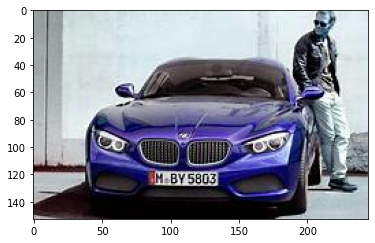

In [12]:
plt.imshow(img) # bgr(blue,green,red)

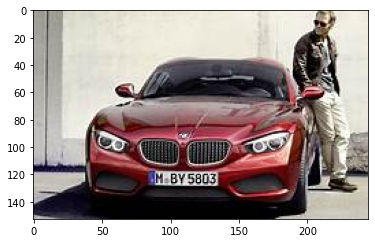

In [13]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [14]:
ClassIndex, confidence, bbox = model.detect(img,confThreshold=0.5)

In [15]:
print(ClassIndex)

[1 3]


In [16]:
font_scale=1
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
    cv2.rectangle(img,boxes,(255,0,0), 2)
    cv2.putText(img,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=3)

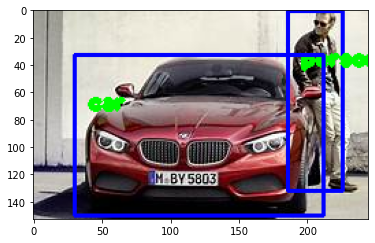

In [17]:
plt.imshow(cv2.cvtColor(img,cv2.COLOR_BGR2RGB))

In [20]:
ClassIndex, confidence, bbox = model.detect(img2,confThreshold=0.5)

In [21]:
print(ClassIndex)

[1 1 1 1]


In [22]:
font_scale=1
font=cv2.FONT_HERSHEY_PLAIN
for ClassInd, conf, boxes in zip(ClassIndex, confidence, bbox):
    cv2.rectangle(img2,boxes,(255,0,0), 2)
    cv2.putText(img2,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0), thickness=2)

Video Demo

In [ ]:
cap = cv2.VideoCapture("Sample4.mp4")
# check if the video is openned correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    N = str(ClassIndex)
    try:
        if(N[1]!=')' or N[1]!=' '):
            n = int(N[1])
            speaktext(classLabels[n-1])
    except:
        continue
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=91):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0),thickness=3)
    
    cv2.imshow('Object Detection Frame',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

[4 4 4 4 4 4 4 4]
[4 4]
[4 4]
[4 4 4]
[4 4]
[4]
[4 4 4 4 4]
[4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4 4]
[ 4  4  4  4  4  4 28  4  4  4  4]
[4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4]
[4 4 4 4 4 4]
[4 4 4 4 4 4 4 4]
[4 4 4 4 4 4]
[4 4 4 4 4]
[4 4 4 4]
[4 4 4 4 4 4 4]
[4 4 4 4]
[4 4 4 4 4 4]
[4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4]
[4 4 4 4]
[4 4 4]
[4 4]
[4 4 4 4 4 4 4 4 4 4 4]
()
()
()
[4]
[4 4 4 4 4 4 4]
[4 4 4 4 4]
[4 4]
[4]
[4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4]
()
[4]
[4 4 4 4]
[4 4 4 4 4]
[4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4]
()
[4 4 4 4 4 4 4 4 4]
()
[4]
[4 4 4]
[4 6 4 4]
[4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4 4]
[4 4 4 4 4 4 4 4 4 4 4]
[4]
[4 4]
[4 4 4 4 4 4]
[4 4]
()
[4 4 4 4]
()
[4 4 4]
[4]
()
[4 4 4 4 4]
[4]
[4]
[4 4 4 4]
[4]
[4 4 4]
[4 4 4 4]
()
()
[4]
[4 1]
()
()
()
()
()
[64]
()
()
[4 4 4 4]
[4 4 4 4 4]
[4 4 4 4]


### Web Camera

In [ ]:
cap = cv2.VideoCapture(1)
# check if the video is openned correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open webcam")
    
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=91):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0),thickness=3)
    
    cv2.imshow('Object Detection Frame',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()

In [ ]:
cap = cv2.VideoCapture("Sample6.mp4")
# check if the video is openned correctly
if not cap.isOpened():
    cap = cv2.VideoCapture(0)
if not cap.isOpened():
    raise IOError("Cannot open video")
    
font_scale=3
font=cv2.FONT_HERSHEY_PLAIN

while True:
    ret,frame = cap.read()
    ClassIndex, confidence, bbox = model.detect(frame,confThreshold=0.55)
    
    print(ClassIndex)
    if(len(ClassIndex)!=0):
        for ClassInd, conf, boxes in zip(ClassIndex.flatten(), confidence.flatten(), bbox):
            if(ClassInd<=91):
                cv2.rectangle(frame,boxes,(255,0,0),2)
                cv2.putText(frame,classLabels[ClassInd-1],(boxes[0]+10,boxes[1]+40), font, fontScale=font_scale,color=(0,255,0),thickness=3)
    
    cv2.imshow('Object Detection Frame',frame)
    
    if cv2.waitKey(2) & 0xFF == ord('q'):
        break
    
cap.release()
cv2.destroyAllWindows()